In [3]:
%cd ..

import numpy as np
from scripts.operator_approx import cheb_op_ap
from scripts.adjacency_to_super import create_super_adjacency, generate_opp_approx
import matplotlib.pyplot as plt

c:\Users\dbruw\DENR3901\DENR3901


In [24]:
alpha = 2

def tent_map(x):
    return alpha*np.minimum(x, 1-x)

# This is only the left branch. 
def L_left(phi):
    return lambda x: np.where((x >= 0) & (x <= alpha/2), (1/alpha)*(phi(x/alpha)), np.nan)

# This is only the right branch. 
def L_right(phi):
    return lambda x: np.where((x >= 0) & (x <= alpha/2), (1/alpha)*(phi(1-x/alpha)), np.nan)

In [25]:
# just sample data. Comes from the left branch of the tent map for alpha=1.9. Just coppied over for now.

domains = [
    (0.0, 1),
    (0.0, 0.95),
    (0.095, 0.95),
    (0.1805, 0.95),
    (0.34295, 0.95),
    (0.651605, 0.95)
]

left_matrix = np.array(
    [[0, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0]]
)

right_matrix = np.array(
    [[0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0]]
)

# sample for a=2
domains = [(0, 1)]
left_matrix = np.array([[1]])
right_matrix = np.array([[1]])

In [26]:
# Takes the adjacecny matrix, the list of domains, and the trasnfer oprator and create the super adjacency matrix.

K = N = 50

super_adjacency_matrix_left = create_super_adjacency(left_matrix, domains, L_left, K, N)
super_adjacency_matrix_right = create_super_adjacency(right_matrix, domains, L_right, K, N)

super_adjacency_matrix = super_adjacency_matrix_left + super_adjacency_matrix_right

In [27]:
evals = np.linalg.eigvals(super_adjacency_matrix)

In [28]:
def L(phi):
    return lambda x: np.where((x >= 0) & (x <= alpha/2), (1/alpha)*(phi(x/alpha) + phi(1-x/alpha)), np.nan)

In [29]:
L_hat = cheb_op_ap(L, 500, 500, (0, 1), (0, alpha/2)).T
evals_worse = np.linalg.eigvals(L_hat)

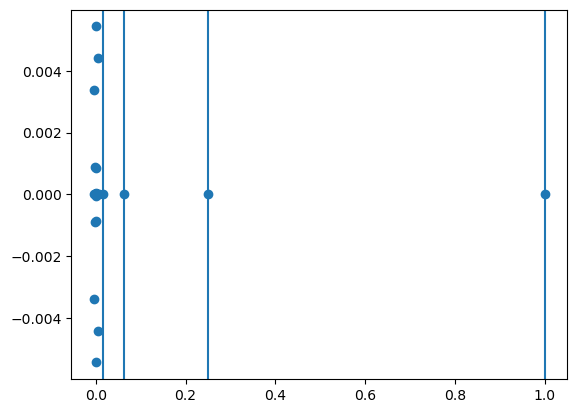

In [39]:
plt.scatter(np.real(evals), np.imag(evals))
# These are the true eigenvalues for alpha=2.
plt.axvline(1)
plt.axvline(1/4)
plt.axvline((1/4)**2)
plt.axvline((1/4)**3)
plt.show()